In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

from itertools import islice

In [2]:
from gluonts.evaluation import make_evaluation_predictions, Evaluator
from gluonts.dataset.repository.datasets import get_dataset

from estimator import ReformerEstimator

In [3]:
dataset = get_dataset("electricity")

In [4]:
dataset

TrainDatasets(metadata=MetaData(freq='1H', target=None, feat_static_cat=[CategoricalFeatureInfo(name='feat_static_cat', cardinality='321')], feat_static_real=[], feat_dynamic_real=[], feat_dynamic_cat=[], prediction_length=24), train=<gluonts.dataset.common.FileDataset object at 0x7efbe61ecc70>, test=<gluonts.dataset.common.FileDataset object at 0x7efbe61ecc40>)

In [7]:
estimator = ReformerEstimator(
    freq=dataset.metadata.freq,
    prediction_length=dataset.metadata.prediction_length,
    context_length=dataset.metadata.prediction_length*7,
    
    # 
    num_feat_static_cat=1,
    cardinality=[321],
    embedding_dimension=[3],
    
    # attention hyper-params
    num_encoder_layers=2,
    num_decoder_layers=2,
    nhead=2,
    
    # training params
    batch_size=128,
    num_batches_per_epoch=100,
    trainer_kwargs=dict(max_epochs=5, accelerator='gpu', gpus=1),
)

In [8]:
predictor = estimator.train(
    training_data=dataset.train,
    num_workers=8,
    shuffle_buffer_length=1024
)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type                  | Params
------------------------------------------------
0 | model | ReformerModel         | 113 K 
1 | loss  | NegativeLogLikelihood | 0     
------------------------------------------------
113 K     Trainable params
0         Non-trainable params
113 K     Total params
0.452     Total estimated model params size (MB)
/home/kashif/gluon-ts-PR/src/gluonts/dataset/common.py:326: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp = pd.Timestamp(timestamp_input, freq=freq)
/home/kashif/gluon-ts-PR/src/gluonts/dataset/common.py:329: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  if isinstance(timestamp.freq, Tick):
/home/kashif/gluon-ts-PR/src/gluonts/dataset/common.p

/home/kashif/gluon-ts-PR/src/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  return _shift_timestamp_helper(ts, ts.freq, offset)
/home/kashif/gluon-ts-PR/src/gluonts/dataset/common.py:331: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  timestamp.floor(timestamp.freq), timestamp.freq
/home/kashif/gluon-ts-PR/src/gluonts/dataset/common.py:330: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  return pd.Timestamp(
/home/kashif/gluon-ts-PR/src/gluonts/transform/feature.py:365: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  self._freq_base = start.freq.base
/home/kashif/gluon-ts-PR/src/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  return _shift_timestamp_helper(ts, ts.freq, offset)
/home/kashif/gluon-ts-PR/src/gluonts/

Training: 0it [00:00, ?it/s]

Epoch 0, global step 100: 'train_loss' reached 6.33992 (best 6.33992), saving model to '/mnt/scratch/kashif/pytorch-transformer-ts/reformer/lightning_logs/version_14/checkpoints/epoch=0-step=100.ckpt' as top 1
Epoch 1, global step 200: 'train_loss' reached 5.93123 (best 5.93123), saving model to '/mnt/scratch/kashif/pytorch-transformer-ts/reformer/lightning_logs/version_14/checkpoints/epoch=1-step=200.ckpt' as top 1
Epoch 2, global step 300: 'train_loss' reached 5.80556 (best 5.80556), saving model to '/mnt/scratch/kashif/pytorch-transformer-ts/reformer/lightning_logs/version_14/checkpoints/epoch=2-step=300.ckpt' as top 1
Epoch 3, global step 400: 'train_loss' reached 5.64621 (best 5.64621), saving model to '/mnt/scratch/kashif/pytorch-transformer-ts/reformer/lightning_logs/version_14/checkpoints/epoch=3-step=400.ckpt' as top 1
Epoch 4, global step 500: 'train_loss' reached 5.54637 (best 5.54637), saving model to '/mnt/scratch/kashif/pytorch-transformer-ts/reformer/lightning_logs/versi

In [9]:
forecast_it, ts_it = make_evaluation_predictions(
    dataset=dataset.test, 
    predictor=predictor
)

In [10]:
forecasts = list(forecast_it)

/home/kashif/gluon-ts-PR/src/gluonts/dataset/common.py:326: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp = pd.Timestamp(timestamp_input, freq=freq)
/home/kashif/gluon-ts-PR/src/gluonts/dataset/common.py:329: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  if isinstance(timestamp.freq, Tick):
/home/kashif/gluon-ts-PR/src/gluonts/dataset/common.py:331: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  timestamp.floor(timestamp.freq), timestamp.freq
/home/kashif/gluon-ts-PR/src/gluonts/dataset/common.py:330: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  return pd.Timestamp(
/home/kashif/gluon-ts-PR/src/gluonts/transform/feature.py:365: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  self._freq_base = start.freq.base
/home/kashif/gluon-ts-PR/src/gluo

AssertionError: Sequence length (169) needs to be divisible by target bucket size  x 2 - 192

In [11]:
tss = list(ts_it)

In [12]:
evaluator = Evaluator()

In [13]:
agg_metrics, ts_metrics = evaluator(iter(tss), iter(forecasts))

NameError: name 'forecasts' is not defined

In [35]:
agg_metrics

{'MSE': 2826393.0638119513,
 'abs_error': 9406683.103641033,
 'abs_target_sum': 128632956.0,
 'abs_target_mean': 2385.272140631954,
 'seasonal_error': 189.49338196116761,
 'MASE': 0.7431191168044774,
 'MAPE': 0.09109633547159084,
 'sMAPE': 0.10563760783764822,
 'MSIS': 5.767997425106159,
 'QuantileLoss[0.1]': 3974763.955770738,
 'Coverage[0.1]': 0.12711392968402313,
 'QuantileLoss[0.2]': 6249950.183714624,
 'Coverage[0.2]': 0.248739059486723,
 'QuantileLoss[0.3]': 7793862.005873694,
 'Coverage[0.3]': 0.3646157840083074,
 'QuantileLoss[0.4]': 8841786.31629891,
 'Coverage[0.4]': 0.47763684913217624,
 'QuantileLoss[0.5]': 9406683.052603077,
 'Coverage[0.5]': 0.5858737576027296,
 'QuantileLoss[0.6]': 9485500.915407892,
 'Coverage[0.6]': 0.6767727340157247,
 'QuantileLoss[0.7]': 9009100.387483194,
 'Coverage[0.7]': 0.7680611185284083,
 'QuantileLoss[0.8]': 7785504.029701689,
 'Coverage[0.8]': 0.84961430054888,
 'QuantileLoss[0.9]': 5386472.509541044,
 'Coverage[0.9]': 0.9225634178905207,
 '

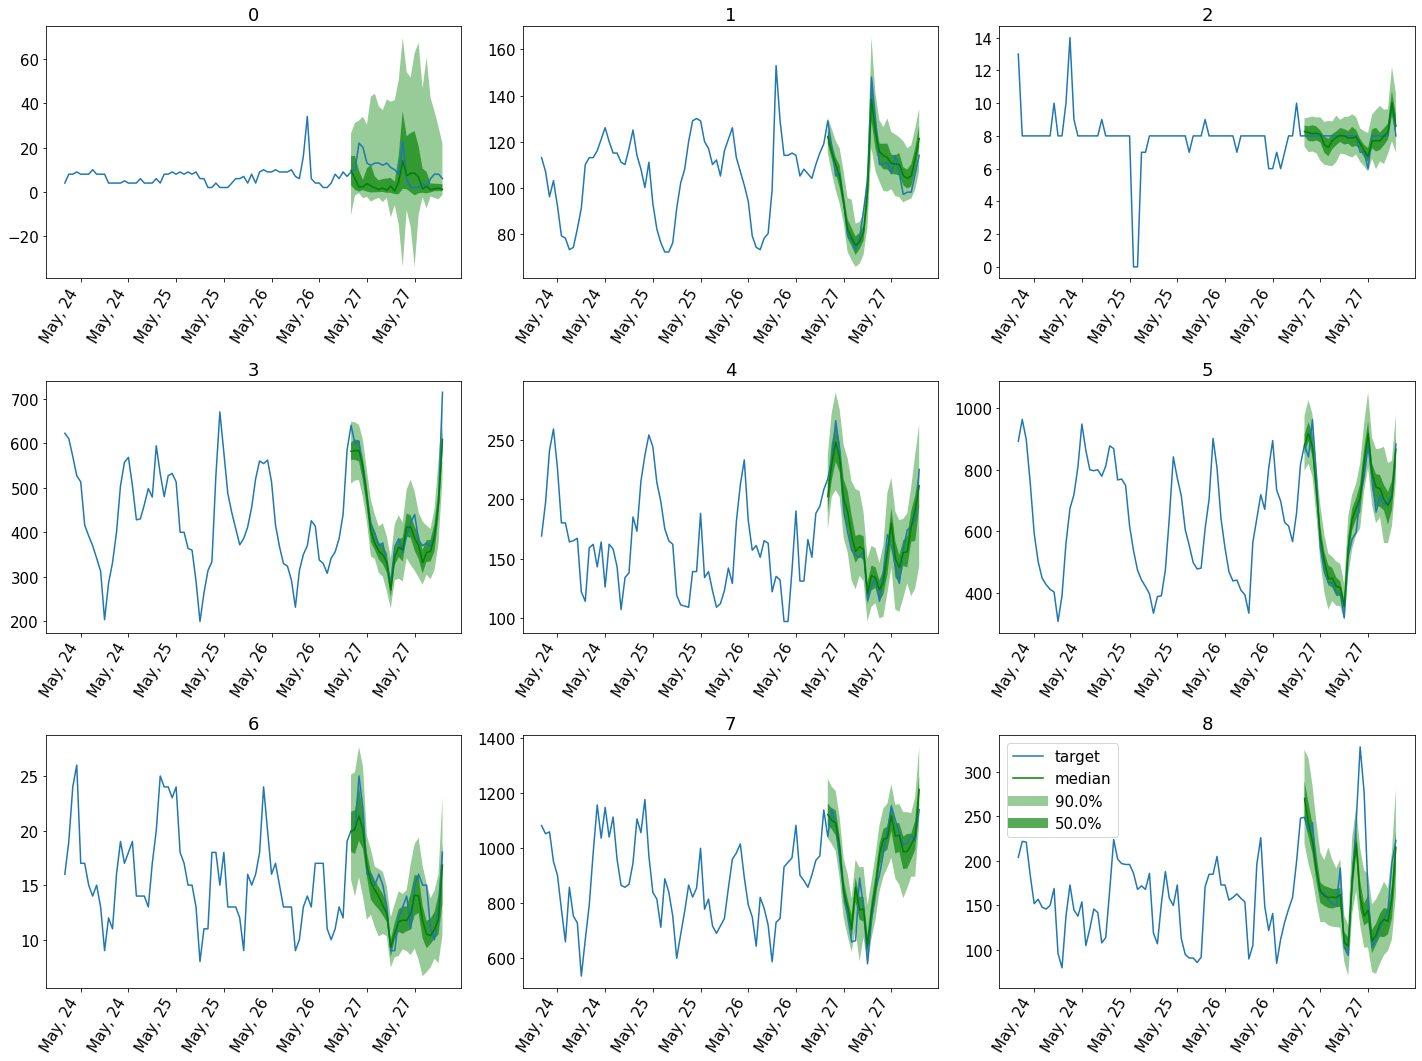

In [36]:
plt.figure(figsize=(20, 15))
date_formater = mdates.DateFormatter('%b, %d')
plt.rcParams.update({'font.size': 15})

for idx, (forecast, ts) in islice(enumerate(zip(forecasts, tss)), 9):
    ax = plt.subplot(3, 3, idx+1)

    plt.plot(ts[-4 * dataset.metadata.prediction_length:], label="target", )
    forecast.plot( color='g')
    plt.xticks(rotation=60)
    plt.title(forecast.item_id)
    ax.xaxis.set_major_formatter(date_formater)

plt.gcf().tight_layout()
plt.legend()
plt.show()